In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd 
import ast

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['lines.markersize'] = 8
matplotlib.rcParams['grid.color'] = '0.9'
matplotlib.rcParams['grid.linestyle'] = '-'
matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
matplotlib.rcParams['savefig.format'] = 'pdf'

blue =  '#377eb8'
orange = '#ff7f00'
green = '#4daf4a'
red = '#e41a1c'
dark_red="#bf0041"

# Setup some basic functions

In [2]:
def rmse(list1, list2):
    
    squared_differences = np.square(np.subtract(list1, list2))
    mean_squared_difference = np.mean(squared_differences)

    return np.sqrt(mean_squared_difference)

def MRAE(list1, list2):
    absolute_differences = np.abs(np.subtract(list1, list2))
    relative_absolute_differences = absolute_differences / np.abs(list1)

    return np.mean(relative_absolute_differences)

def mae(list1, list2):
  absolute_differences = np.abs(np.subtract(list1, list2))
  return np.mean(absolute_differences)   
    
def plot_heat_capacity_comparison(df_file, rev_calc_df, output_file=None,returning=False):
    # Load the DataFrame
    df = pd.read_csv(df_file)
    
    # Initialize lists for storing values
    ratios = []
    rev_c_v_300_gravs = []
    c_v_300_gravs = []
    
    # Iterate through the DataFrame rows
    for _, row in df.iterrows():
        try:
            name = row["File_Name"].split(".")[0]
            c_v_300_grav = row["Cv_gravimetric_300"]
            c_v_300_molar = row["Cv_molar_300"]
            if np.isnan(c_v_300_grav):
                continue
            rev_row = rev_calc_df.loc[rev_calc_df.iloc[:, 0] == name]
            rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
            rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])
            
            c_v_300_gravs.append(c_v_300_grav)
            rev_c_v_300_gravs.append(rev_c_v_300_grav)
            
            ratios.append(c_v_300_grav / rev_c_v_300_gravs[-1])
        except Exception as e:
            pass
    
    # Calculate MRAE and MAE values
    MRAE_value = MRAE(rev_c_v_300_gravs, c_v_300_gravs)
    mae_value = mae(rev_c_v_300_gravs, c_v_300_gravs)
    
    # Create the scatter plot
    plt.scatter(rev_c_v_300_gravs, c_v_300_gravs, color=blue)
    
    diagonal_line = np.linspace(min(rev_c_v_300_gravs), max(rev_c_v_300_gravs), len(rev_c_v_300_gravs))
    plt.plot(diagonal_line, diagonal_line, color='k')
    
    # Set labels and title
    plt.xlabel(r"DFT $C_\nu$ (J/(g$\cdot$K))")
    plt.ylabel(r"MACE-MP-0 $C_\nu$ (J/(g$\cdot$K))")
    plt.title("")
    
    # Create a text box for results with rounded values (2 decimal places)
    textstr = f"MRAE: {MRAE_value * 100:.2f}% \nMAE:  {mae_value:.2f}"
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(0.85, 0.5, textstr, fontsize=14, verticalalignment='top', bbox=props)

    if output_file:
        plt.savefig(output_file)
    plt.show()
    if returning==True:
        return rev_c_v_300_gravs,c_v_300_gravs

# Analize the frequencies for the unit cells 

In [3]:
self_calc_df=pd.read_csv("./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv")

In [4]:
list_of_array_freq=[]
for i in self_calc_df["freq"]:  
    try:
        list_of_array_freq.append(np.asarray(ast.literal_eval(i)))
    except:
        pass

zero_counts = [np.count_nonzero(arr == 0.0) for arr in list_of_array_freq]
zero_counts_relative = [100*np.count_nonzero(arr == 0.0)/arr.shape[0] for arr in list_of_array_freq]

Number of im. freq.:  [0.0, 0.3401360544217687, 0.3401360544217687, 0.3508771929824561, 0.5128205128205128, 0.3968253968253968, 0.8333333333333334, 0.5555555555555556, 0.1388888888888889, 0.9259259259259259, 0.6944444444444444, 0.966183574879227, 2.314814814814815, 0.6172839506172839, 0.6172839506172839, 5.128205128205129, 3.0303030303030303, 3.0303030303030303, 1.5151515151515151, 1.5151515151515151, 1.2820512820512822, 2.2222222222222223, 1.1111111111111112, 1.1111111111111112, 1.0416666666666667, 3.125, 1.9607843137254901, 1.9607843137254901, 0.9803921568627451, 1.8518518518518519, 0.9259259259259259, 0.9259259259259259, 1.8518518518518519, 1.8018018018018018, 1.7543859649122806, 0.8771929824561403, 1.7543859649122806, 0.8771929824561403, 0.8771929824561403, 2.6315789473684212, 2.5641025641025643, 0.8333333333333334, 1.6666666666666667, 0.8333333333333334, 1.6666666666666667, 1.6666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8130081300813008, 1.5873015873015872, 2.380952

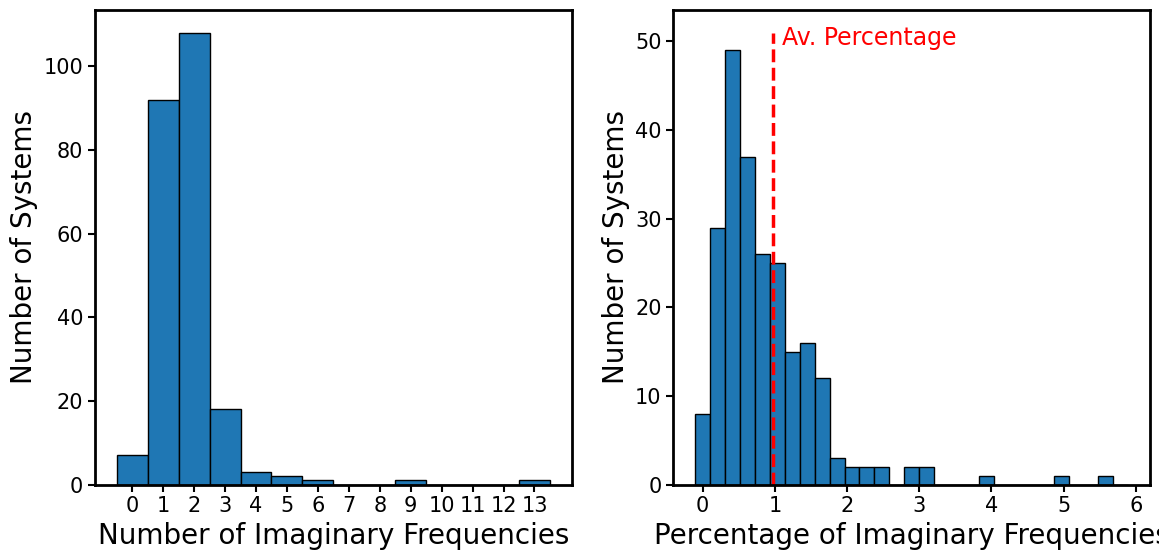

In [5]:
print("Number of im. freq.: ",zero_counts_relative)
av_percent_neg=sum(zero_counts_relative)/len(zero_counts)
print(f"Number of averged neg freq per system: {av_percent_neg}")

# Absolute Numbers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)


plt.hist(zero_counts, bins=range(max(zero_counts) + 2), align='left', edgecolor='black')
plt.xlabel(r'Number of Imaginary Frequencies')
plt.ylabel(r'Number of Systems')
plt.xticks(range(max(zero_counts) + 1))

# Relative Numbers
plt.subplot(1, 2, 2)

plt.hist(zero_counts_relative, bins=np.linspace(0,6,30), align='left', edgecolor='black')
plt.vlines(x=av_percent_neg,ymin=0,ymax=51,color="red",linestyles="--")

plt.text(1.1, 49, f'Av. Percentage', fontsize=17, ha='left', va='bottom', color='red')



plt.xlabel(r'Percentage of Imaginary Frequencies')
plt.ylabel(r'Number of Systems')
plt.xticks(range(7))

plt.tight_layout()
plt.savefig("combined_neg_freq_mace_hessian_d3.pdf")

plt.show()

# Calculating the heat capacity based on the phonon frequencies

### Here, we exclude imaginary frequencies to ensure greater accuracy.


In [6]:
from scipy.constants import h, k, c,N_A

def heat_capacity_list(list_of_freqs, T,threshold=1e-3):
    list_of_Cvs=[]
    list_of_skipped_freq =[]
    for frequencies in list_of_freqs:
        counter=0
        C_v_total = 0.0
        for nu in frequencies:
            if nu<threshold:
                counter+=1
                continue
            x = h * nu * 100 * c / (k * T) 
            if np.isfinite(x) and x > 0:
                C_v_total += k * (x**2) * np.exp(x) / (np.exp(x) - 1)**2
            else:
                counter+=1
                pass
        list_of_skipped_freq.append(counter)
        list_of_Cvs.append(C_v_total * N_A)
    return list_of_Cvs,list_of_skipped_freq


def heat_capacity(frequencies, T,threshold=1e-3):
    counter=0
    C_v_total = 0.0
    for nu in frequencies:
        if nu<threshold:
            counter+=1
            continue
        x = h * nu * 100 * c / (k * T) 
        if np.isfinite(x) and x > 0:
            C_v_total += k * (x**2) * np.exp(x) / (np.exp(x) - 1)**2
        else:
            counter+=1
            pass
    return C_v_total * N_A

In [7]:
c_vs,_=heat_capacity_list(list_of_array_freq,300)
c_vs_grav = c_vs/self_calc_df["Atomic_weight"]
c_vs_molar = c_vs/self_calc_df["Number_of_atoms"]


# Comparison between MACE-MP-0 and DFT heat capcities

In [8]:
rev_calc_df=pd.read_csv("/work/home/ngoen/Documents/thermodynamic_properties/reference_database_heat_capacit/DFT/DFT_cp_allstructures.csv")

/tmp/user/25215/ipykernel_351615/2553092198.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
/tmp/user/25215/ipykernel_351615/2553092198.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])


cannot convert the series to <class 'float'>


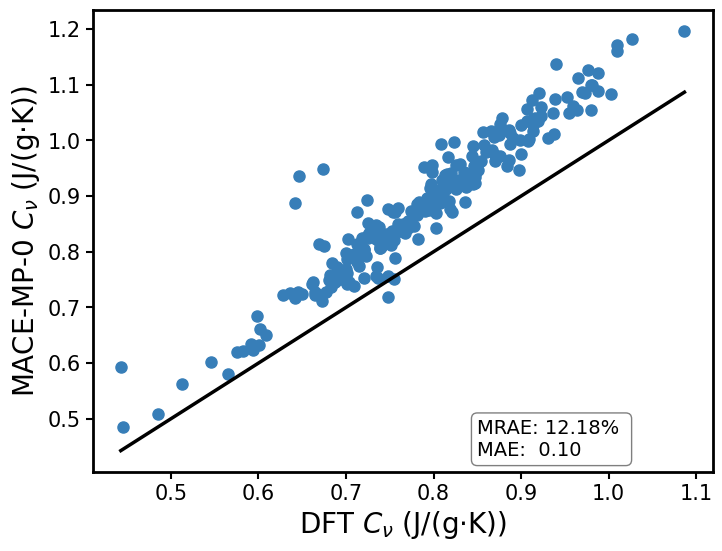

In [9]:
df_file = "./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv"
# Load the DataFrame
df = pd.read_csv(df_file)

# Initialize lists for storing values
ratios = []
rev_c_v_300_gravs = []
c_v_300_gravs = []

# Iterate through the DataFrame rows
for _, row in df.iterrows():
    try:
        name = row["File_Name"].split(".")[0]
        freq= np.asarray(ast.literal_eval(row["freq"]))
        cv= heat_capacity(freq,300,threshold=1e-9)
        c_v_300_grav = cv/row["Atomic_weight"]
        c_v_300_molar = cv/row["Number_of_atoms"]
        if np.isnan(c_v_300_grav):
            continue
        rev_row = rev_calc_df.loc[rev_calc_df.iloc[:, 0] == name]
        rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
        rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])
        
        c_v_300_gravs.append(c_v_300_grav)
        rev_c_v_300_gravs.append(rev_c_v_300_grav)
        
    except Exception as e:
        print(e)
        pass

# Calculate MRAE and MAE values
MRAE_value = MRAE(rev_c_v_300_gravs, c_v_300_gravs)
mae_value = mae(rev_c_v_300_gravs, c_v_300_gravs)

# Create the scatter plot
plt.scatter(rev_c_v_300_gravs, c_v_300_gravs, color=blue)

diagonal_line = np.linspace(min(rev_c_v_300_gravs), max(rev_c_v_300_gravs), len(rev_c_v_300_gravs))
plt.plot(diagonal_line, diagonal_line, color='k')

# Set labels and title
plt.xlabel(r"DFT $C_\nu$ (J/(g$\cdot$K))")
plt.ylabel(r"MACE-MP-0 $C_\nu$ (J/(g$\cdot$K))")
plt.title("")

# Create a text box for results with rounded values (2 decimal places)
textstr = f"MRAE: {MRAE_value * 100:.2f}% \nMAE:  {mae_value:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.85, 0.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.savefig("MACE_DFTD3_cell_opt_vs_DFT.svg")
plt.show()

### It is clear that smaller values deviate less compared to larger values. Therefore, applying a linear correction factor would be very useful.  
### To achieve this, we use SciPy to determine the optimal value in the following section.

In [10]:
def calculate_gravimetric_heat_capacity(row, x, rev_calc_df):
    """Helper function to calculate gravimetric heat capacity and compare with reference."""
    name = row["File_Name"].split(".")[0]
    freq = np.asarray(ast.literal_eval(row["freq"]))
    cv = heat_capacity(freq * x, 300, threshold=1e-9)
    c_v_300_grav = cv / row["Atomic_weight"]
    
    # Skip if the calculated value is NaN
    if np.isnan(c_v_300_grav):
        return None, None

    # Find the reference row
    rev_row = rev_calc_df.loc[rev_calc_df.iloc[:, 0] == name]
    if rev_row.empty:
        return None, None  # Skip if no matching reference row found

    # Extract reference values
    rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"].iloc[0])
    return c_v_300_grav, rev_c_v_300_grav

def get_metric_for_opt(x, metric_function, df_file, rev_calc_df):
    """Generic function to compute a metric (MRAE, MAE, etc.) for optimization."""
    # Load the DataFrame
    df = pd.read_csv(df_file)

    # Initialize lists for storing values
    rev_c_v_300_gravs = []
    c_v_300_gravs = []

    # Iterate through the DataFrame rows
    for _, row in df.iterrows():
        try:
            c_v_300_grav, rev_c_v_300_grav = calculate_gravimetric_heat_capacity(row, x, rev_calc_df)
            if c_v_300_grav is not None and rev_c_v_300_grav is not None:
                c_v_300_gravs.append(c_v_300_grav)
                rev_c_v_300_gravs.append(rev_c_v_300_grav)
        except (ValueError, KeyError) as e:
            print(f"Skipping row due to error: {e}")
            continue

    # Calculate and return the desired metric
    return metric_function(rev_c_v_300_gravs, c_v_300_gravs)

def get_MRAE_for_opt(x):
    """Calculate MRAE for a given scaling factor x."""
    df_file = "./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv"
    return get_metric_for_opt(x, MRAE, df_file, rev_calc_df)

def get_mae_for_opt(x):
    """Calculate MAE for a given scaling factor x."""
    df_file = "./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv"
    return get_metric_for_opt(x, mae, df_file, rev_calc_df)


In [11]:
from scipy.optimize import minimize_scalar
# Optimize using minimize_scalar with bounds
result = minimize_scalar(get_mae_for_opt, bounds=(0.1, 5), method='bounded')

# Print the results
print("Optimal value of x within bounds:", result.x)
print("Function value at optimal x:", result.fun)


Optimal value of x within bounds: 1.1807013849285521
Function value at optimal x: 0.02131637647980632


In [12]:
from scipy.optimize import minimize_scalar
# Optimize using minimize_scalar with bounds
result = minimize_scalar(get_MRAE_for_opt, bounds=(0.1, 5), method='bounded')

# Print the results
print("Optimal value of x within bounds:", result.x)
print("Function value at optimal x:", result.fun)


Optimal value of x within bounds: 1.180702793914689
Function value at optimal x: 0.02858445720972344


cannot convert the series to <class 'float'>


/tmp/user/25215/ipykernel_351615/4281922293.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
/tmp/user/25215/ipykernel_351615/4281922293.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])


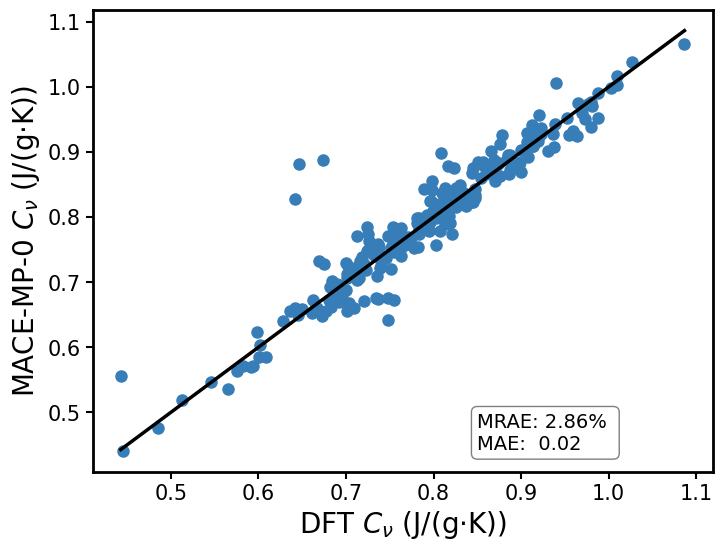

In [13]:
df_file = "./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv"
# Load the DataFrame
df = pd.read_csv(df_file)

# Initialize lists for storing values
ratios = []
rev_c_v_300_gravs = []
c_v_300_gravs = []

# Iterate through the DataFrame rows
for _, row in df.iterrows():
    try:
        name = row["File_Name"].split(".")[0]
        freq= np.asarray(ast.literal_eval(row["freq"]))*1.181
        cv= heat_capacity(freq,300,threshold=1e-9)
        c_v_300_grav = cv/row["Atomic_weight"]
        c_v_300_molar = cv/row["Number_of_atoms"]
        if np.isnan(c_v_300_grav):
            continue
        rev_row = rev_calc_df.loc[rev_calc_df.iloc[:, 0] == name]
        rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
        rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])
        
        c_v_300_gravs.append(c_v_300_grav)
        rev_c_v_300_gravs.append(rev_c_v_300_grav)
        
    except Exception as e:
        print(e)
        pass

# Calculate MRAE and MAE values
MRAE_value = MRAE(rev_c_v_300_gravs, c_v_300_gravs)
mae_value = mae(rev_c_v_300_gravs, c_v_300_gravs)

# Create the scatter plot
plt.scatter(rev_c_v_300_gravs, c_v_300_gravs, color=blue)

diagonal_line = np.linspace(min(rev_c_v_300_gravs), max(rev_c_v_300_gravs), len(rev_c_v_300_gravs))
plt.plot(diagonal_line, diagonal_line, color='k')

# Set labels and title
plt.xlabel(r"DFT $C_\nu$ (J/(g$\cdot$K))")
plt.ylabel(r"MACE-MP-0 $C_\nu$ (J/(g$\cdot$K))")
plt.title("")

# Create a text box for results with rounded values (2 decimal places)
textstr = f"MRAE: {MRAE_value * 100:.2f}% \nMAE:  {mae_value:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.85, 0.5, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.savefig("Corrected_MACE_DFTD3_cell_opt_vs_DFT.svg")
plt.show()

/tmp/user/25215/ipykernel_351615/3766255112.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
/tmp/user/25215/ipykernel_351615/3766255112.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])


cannot convert the series to <class 'float'>
0.10673294956539323 0.09608083521572312
0.12178773749734866 0.09608083521572312
cannot convert the series to <class 'float'>


/tmp/user/25215/ipykernel_351615/3766255112.py:81: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
/tmp/user/25215/ipykernel_351615/3766255112.py:82: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])


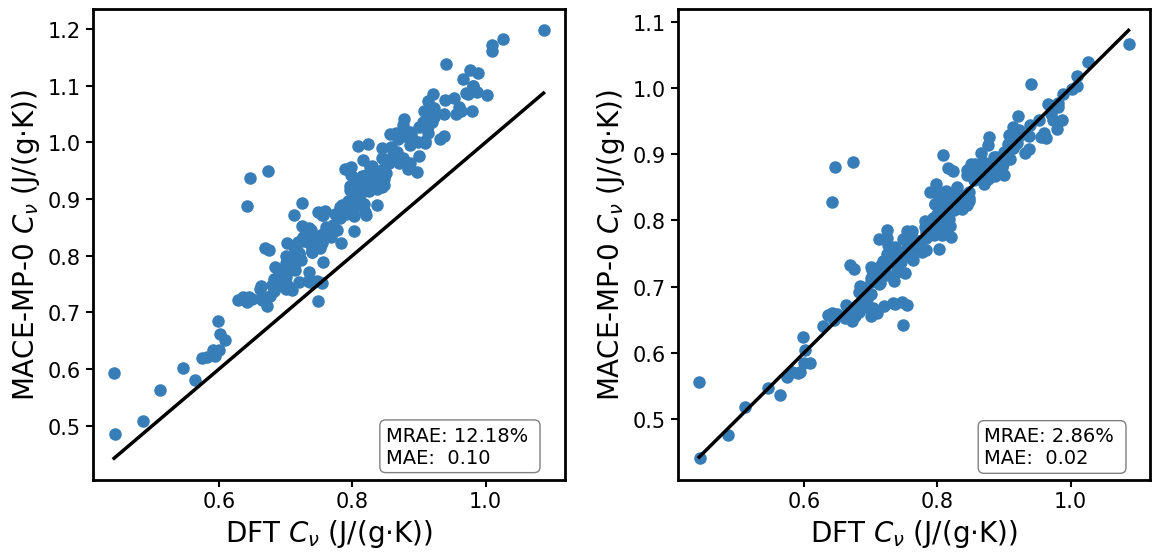

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_file = "./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv"


df = pd.read_csv(df_file)

# Initialize lists for storing values
ratios = []
rev_c_v_300_gravs = []
c_v_300_gravs = []

# Iterate through the DataFrame rows
for _, row in df.iterrows():
    try:
        name = row["File_Name"].split(".")[0]
        freq= np.asarray(ast.literal_eval(row["freq"]))
        cv= heat_capacity(freq,300,threshold=1e-9)
        c_v_300_grav = cv/row["Atomic_weight"]
        c_v_300_molar = cv/row["Number_of_atoms"]
        if np.isnan(c_v_300_grav):
            continue
        rev_row = rev_calc_df.loc[rev_calc_df.iloc[:, 0] == name]
        rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
        rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])
        
        c_v_300_gravs.append(c_v_300_grav)
        rev_c_v_300_gravs.append(rev_c_v_300_grav)
        
    except Exception as e:
        print(e)
        pass

MRAE_value = MRAE(c_v_300_gravs, rev_c_v_300_gravs)
mae_value = mae(c_v_300_gravs, rev_c_v_300_gravs)

print(MRAE_value,mae_value)

# Calculate MRAE and MAE values
MRAE_value = MRAE(rev_c_v_300_gravs, c_v_300_gravs)
mae_value = mae(rev_c_v_300_gravs, c_v_300_gravs)

print(MRAE_value,mae_value)

# Create the scatter plot
plt.scatter(rev_c_v_300_gravs, c_v_300_gravs, color=blue)

diagonal_line = np.linspace(min(rev_c_v_300_gravs), max(rev_c_v_300_gravs), len(rev_c_v_300_gravs))
plt.plot(diagonal_line, diagonal_line, color='k')
plt.xlabel(r"DFT $C_\nu$ (J/(g$\cdot$K))")
plt.ylabel(r"MACE-MP-0 $C_\nu$ (J/(g$\cdot$K))")
plt.title("")

# Create a text box for results with rounded values (2 decimal places)
textstr = f"MRAE: {MRAE_value * 100:.2f}% \nMAE:  {mae_value:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.85, 0.5, textstr, fontsize=14, verticalalignment='top', bbox=props)

plt.subplot(1, 2, 2)

df_file = "./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv"
# Load the DataFrame
df = pd.read_csv(df_file)

# Initialize lists for storing values
ratios = []
rev_c_v_300_gravs = []
c_v_300_gravs = []

# Iterate through the DataFrame rows
for _, row in df.iterrows():
    try:
        name = row["File_Name"].split(".")[0]
        freq= np.asarray(ast.literal_eval(row["freq"]))*1.181
        cv= heat_capacity(freq,300,threshold=1e-9)
        c_v_300_grav = cv/row["Atomic_weight"]
        c_v_300_molar = cv/row["Number_of_atoms"]
        if np.isnan(c_v_300_grav):
            continue
        rev_row = rev_calc_df.loc[rev_calc_df.iloc[:, 0] == name]
        rev_c_v_300_grav = float(rev_row["Cv_gravimetric_300.00"])
        rev_c_v_300_molar = float(rev_row["Cv_molar_300.00"])
        
        c_v_300_gravs.append(c_v_300_grav)
        rev_c_v_300_gravs.append(rev_c_v_300_grav)
        
    except Exception as e:
        print(e)
        pass

# Calculate MRAE and MAE values
MRAE_value = MRAE(rev_c_v_300_gravs, c_v_300_gravs)
mae_value = mae(rev_c_v_300_gravs, c_v_300_gravs)

# Create the scatter plot
plt.scatter(rev_c_v_300_gravs, c_v_300_gravs, color=blue)

diagonal_line = np.linspace(min(rev_c_v_300_gravs), max(rev_c_v_300_gravs), len(rev_c_v_300_gravs))
plt.plot(diagonal_line, diagonal_line, color='k')
plt.xlabel(r"DFT $C_\nu$ (J/(g$\cdot$K))")
plt.ylabel(r"MACE-MP-0 $C_\nu$ (J/(g$\cdot$K))")
plt.title("")
textstr = f"MRAE: {MRAE_value * 100:.2f}% \nMAE:  {mae_value:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.87, 0.489, textstr, fontsize=14, verticalalignment='top', bbox=props)


plt.tight_layout()
plt.savefig("combined_MACE_DFTD3_cell_opt_vs_DFT.pdf")
plt.show()

# Now for the 2x2x2 supercells

In [15]:
self_calc_df_s222=pd.read_csv("s222_comparison/extended_combined_C_v_screening_opt_MACE_for_CVs_BFGS_s222_used_opt_sum_d3.csv")

## First taking a look at the imaginary frequencies

In [16]:

list_of_array_freq=[]
for index,i in enumerate(self_calc_df_s222["freq"]):  
    try:
        list_of_array_freq.append(np.asarray(ast.literal_eval(i)))
    except:   
        pass

print(len(list_of_array_freq))
    
zero_counts = [np.count_nonzero(list_of_array_freq[188] == 0.0)]
zero_counts

232


[29]

In [17]:
zero_counts = [np.count_nonzero(arr == 0.0) for arr in list_of_array_freq]

zero_counts_relative = [100*np.count_nonzero(arr == 0.0)/arr.shape[0] for arr in list_of_array_freq]


In [18]:
# Using list comprehension
values_larger_than_3 = [count for count in zero_counts if count > 3]

# Get the number of values larger than 3
num_values_larger_than_3 = len(values_larger_than_3)
print("Structures with more then 3 im. freq.:",num_values_larger_than_3,num_values_larger_than_3/len(zero_counts))

Structures with more then 3 im. freq.: 42 0.1810344827586207


Number of averged neg freq per system in %: 0.2175568783249277


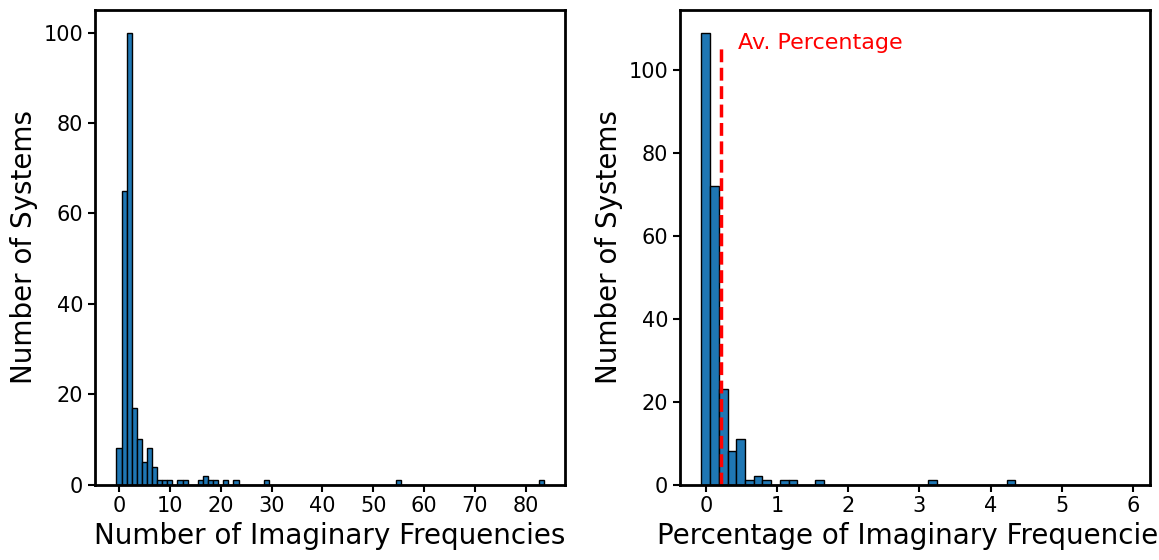

In [19]:
av_percent_neg=sum(zero_counts_relative)/len(zero_counts)
print(f"Number of averged neg freq per system in %: {av_percent_neg}")

# Absolute Numbers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)


plt.hist(zero_counts, bins=range(max(zero_counts) + 2), align='left', edgecolor='black')
plt.xlabel(r'Number of Imaginary Frequencies')
plt.ylabel(r'Number of Systems')
plt.xticks(range(0,max(zero_counts) + 1,10))

# Relative Numbers
plt.subplot(1, 2, 2)

plt.hist(zero_counts_relative, bins=np.linspace(0,6,50), align='left', edgecolor='black')
plt.vlines(x=av_percent_neg,ymin=0,ymax=106,color="red",linestyles="--")
plt.text(0.45, 104, f'Av. Percentage', fontsize=16, ha='left', va='bottom', color='red')
plt.xlabel(r'Percentage of Imaginary Frequencies')
plt.ylabel(r'Number of Systems')
plt.xticks(range(7))

plt.tight_layout()
plt.savefig("combined_neg_freq_mace_hessian_d3_s222.pdf")
plt.show()

In [20]:
print(np.mean(zero_counts),max(zero_counts))

3.478448275862069 83


# Which structures have the high number of imaginary frequencies?

In [21]:
# Example list
my_list = zero_counts

# Get the top 3 values and their indices
top_3_with_indices = sorted(enumerate(my_list), key=lambda x: x[1], reverse=True)[:3]

# Extract the values and their indices
top_3_values = [val for idx, val in top_3_with_indices]
top_3_indices = [idx for idx, val in top_3_with_indices]

print("Top 3 values:", top_3_values)
print("Indices of top 3 values:", top_3_indices)
top_3_indices = [i + 1 if i > 213 else i for i in top_3_indices]

print(self_calc_df_s222["File_Name"][top_3_indices])


Top 3 values: [83, 55, 29]
Indices of top 3 values: [231, 98, 188]
232        VFI.traj
98     RSM0210.traj
188    RSM1162.traj
Name: File_Name, dtype: object


# Checking the finite size effects for MACE-MP-0 for 1x1x1 vs 2x2x2 supercells

RSM1854.traj malformed node or string: nan


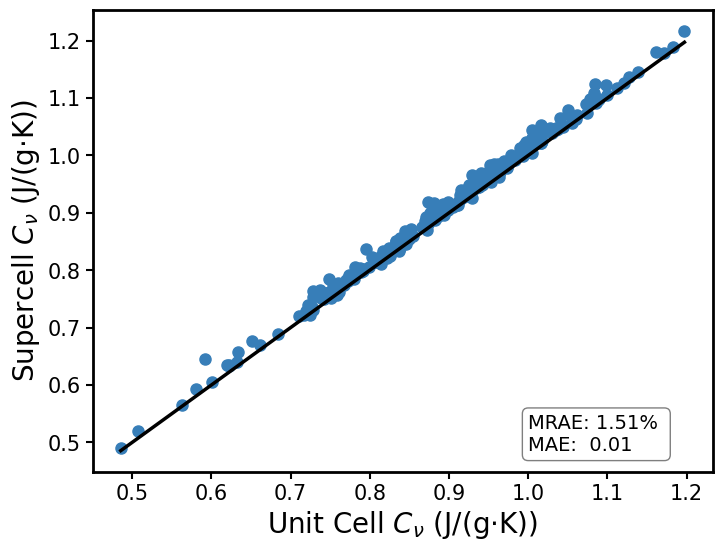

In [22]:
df_file = "./dft_comparison/extended_C_v_screening_opt_MACE_for_CVs_BFGS_used_opt_sum_d3.csv"
df_file_s222 = "./s222_comparison/extended_combined_C_v_screening_opt_MACE_for_CVs_BFGS_s222_used_opt_sum_d3.csv"

df = pd.read_csv(df_file)
df_s222 = pd.read_csv(df_file_s222)

ratios = []
s222_c_v_300_gravs = []
c_v_300_gravs = []

# Iterate through the DataFrame rows
for _, row in df.iterrows():
    try:
        name = row["File_Name"]
        freq= np.asarray(ast.literal_eval(row["freq"]))
        cv= heat_capacity(freq,300,threshold=1e-9)
        c_v_300_grav = cv/row["Atomic_weight"]
        c_v_300_molar = cv/row["Number_of_atoms"]
        if np.isnan(c_v_300_grav):
            continue
        
        rev_row = df_s222.loc[df_s222.iloc[:, 0] == name]
      
        freq= np.asarray(ast.literal_eval(rev_row["freq"].values[0]))
        cv= heat_capacity(freq,300,threshold=1e-9)
        s222_c_v_300_grav = cv/rev_row["Atomic_weight"].values[0]
        s222_c_v_300_molar = cv/rev_row["Number_of_atoms"].values[0]
        if np.isnan(s222_c_v_300_grav):
            continue    
        
        c_v_300_gravs.append(c_v_300_grav)    
        s222_c_v_300_gravs.append(s222_c_v_300_grav)
        
    except Exception as e:
        name = row["File_Name"]
        print(name,e)
        pass
  
rev_c_v_300_gravs =c_v_300_gravs.copy()

# Calculate MRAE and MAE values
MRAE_value = MRAE(rev_c_v_300_gravs, s222_c_v_300_gravs)
mae_value = mae(rev_c_v_300_gravs, s222_c_v_300_gravs)

# Create the scatter plot
plt.scatter(rev_c_v_300_gravs, s222_c_v_300_gravs, color=blue)

diagonal_line = np.linspace(min(rev_c_v_300_gravs), max(rev_c_v_300_gravs), len(rev_c_v_300_gravs))
plt.plot(diagonal_line, diagonal_line, color='k')

plt.xlabel(r"Unit Cell $C_\nu$ (J/(g$\cdot$K))")
plt.ylabel(r"Supercell $C_\nu$ (J/(g$\cdot$K))")

plt.title("")
textstr = f"MRAE: {MRAE_value * 100:.2f}% \nMAE:  {mae_value:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(1.0, 0.55, textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.savefig("MACE_DFTD3_cell_vs_s222.svg")
plt.show()

## In addition to the increased cell size, MLIPs can also handle significantly more data within the same timeframe.

### We calculated the heat capacity for the complete ML dataset from Moosavi et al. (~31,000 structures).

In [23]:
combined_df= pd.read_csv("./large_scale_screening/large_scale_screening/combined_large_scale_C_v_screening_opt_cell.csv")


In [24]:
total_rows = len(combined_df)

nan_count = combined_df['Cv_gravimetric_300'].isna().sum()

nan_percentage = (nan_count / total_rows) * 100
print(f"Percentage of NaN values in 'Cv_gravimetric_300': {nan_percentage:.2f}%")


Percentage of NaN values in 'Cv_gravimetric_300': 1.03%


In [25]:
combined_df = combined_df.dropna(subset=['Cv_gravimetric_300'])
combined_df = combined_df[combined_df['Not_opt'] == False]


In [26]:
print(nan_count)

324


In [27]:
cvs_g = np.array(combined_df["Cv_gravimetric_300"])
number_atoms = np.array(combined_df["Number_of_atoms"])
weights = np.array(combined_df["Atomic_weight"])
c_map= np.array(combined_df["Category"])
combined_df.to_csv('filtered_combined_large_scale_C_v_screening_opt_cell.csv', index=False)
#combined_df

In [28]:
from matplotlib.colors import ListedColormap
blue='#1f77b4'
red= '#d62728'
green ='#2ca02c'

In [29]:
grouped_data=[]

alpha_values = np.where((c_map == 4), 0.15, 0.25)
for category in range(1,6):
    mask = c_map == category 
    grouped_data.append({
        "weights": weights[mask],
        "number_atoms": number_atoms[mask],
        "cvs_g": cvs_g[mask],
        "alpha": alpha_values[mask],
        "category": np.full(mask.sum(), category)
    })

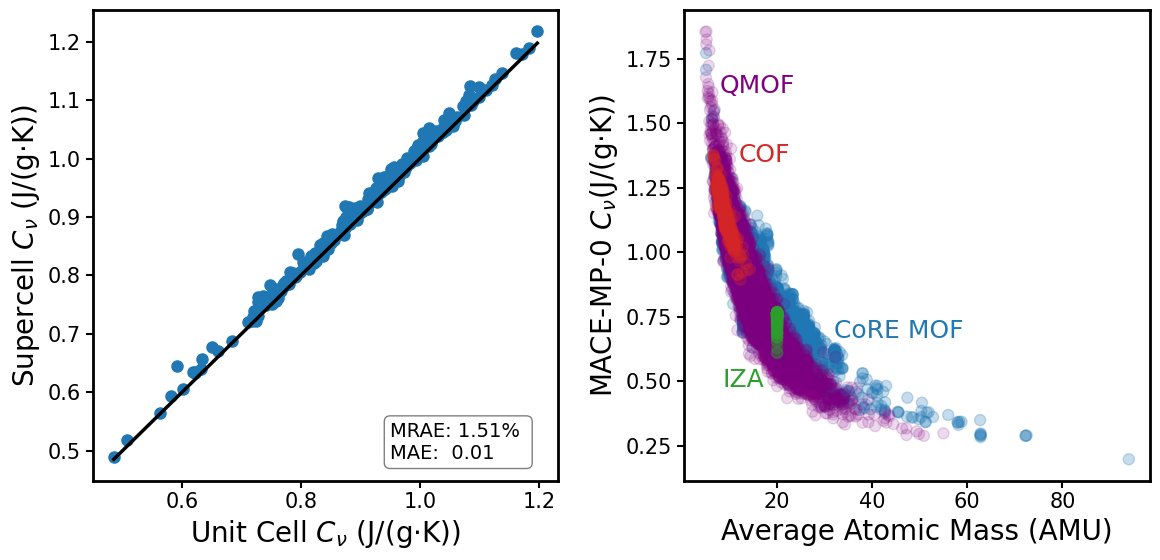

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)

custom_cmap= [red, blue, blue, "purple", green]
order = [5,1,1,2,4]
alpha = np.where((c_map == 1)|(c_map == 5), 0.5, 0.25)
for i, group in enumerate(grouped_data):
    plt.scatter(
        group["weights"] / group["number_atoms"],
        group["cvs_g"],
        alpha=group["alpha"],
        c=custom_cmap[i],
        label=f"Category {i}",
        zorder=order[i],
    )

plt.text(8.5,
        0.48 ,
        "IZA",
        fontsize=18,
        color=green 
    )

plt.text(32, 
        0.67 ,
        "CoRE MOF",
        fontsize=18,
        color=blue 
    )


plt.text(12, 
        1.35 ,
        "COF",
        fontsize=18,
        color=red  
    )
plt.text(8, 
        1.62 ,
        "QMOF",
        fontsize=18,
        color="purple"  
    )

plt.xlabel("Average Atomic Mass (AMU)")
plt.ylabel(r"MACE-MP-0 $C_\nu$(J/(g$\cdot$K))")


plt.subplot(1,2,1)

plt.scatter(rev_c_v_300_gravs, s222_c_v_300_gravs, color=blue)
diagonal_line = np.linspace(min(rev_c_v_300_gravs), max(rev_c_v_300_gravs), len(rev_c_v_300_gravs))
plt.plot(diagonal_line, diagonal_line, color='k')
plt.xlabel(r"Unit Cell $C_\nu$ (J/(g$\cdot$K))")
plt.ylabel(r"Supercell $C_\nu$ (J/(g$\cdot$K))")

textstr = f"MRAE: {MRAE_value * 100:.2f}% \nMAE:  {mae_value:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.95, 0.55, textstr, fontsize=14, verticalalignment='top', bbox=props)

plt.tight_layout() 
plt.savefig("combined_screening_and_MACE_DFTD3_cell_vs_s222_improved.pdf")
plt.show()